
Basic Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

Missing Values:

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           

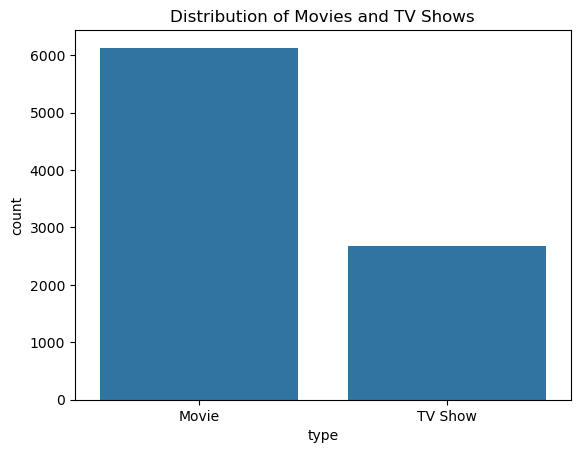


Accuracy Score: 0.7508513053348468

Classification Report:
               precision    recall  f1-score   support

       Movie       0.75      0.96      0.84      1214
     TV Show       0.77      0.28      0.41       548

    accuracy                           0.75      1762
   macro avg       0.76      0.62      0.63      1762
weighted avg       0.76      0.75      0.71      1762



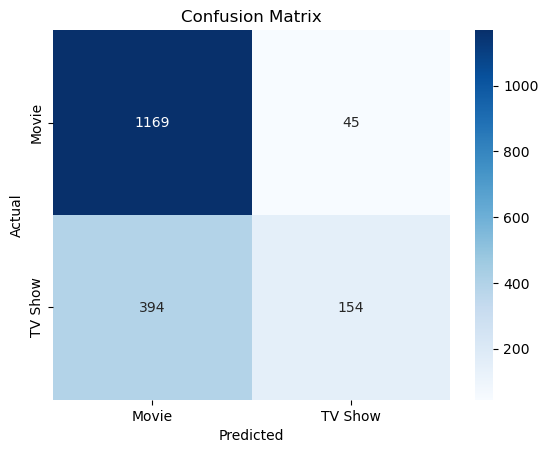


Prediction for sample description: Movie


In [3]:
# Netflix Machine Learning Project - Type Classification (Movie vs TV Show)

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 2: Load the Dataset
file_path = "netflix_titles.csv"  # Make sure the file is in the same folder as your notebook
df = pd.read_csv(file_path)

# Step 3: Exploratory Data Analysis (EDA)
print("\nBasic Information:\n")
print(df.info())
print("\nMissing Values:\n")
print(df.isnull().sum())
print("\nType Counts:\n")
print(df['type'].value_counts())

# Optional: Visualizations
sns.countplot(data=df, x='type')
plt.title('Distribution of Movies and TV Shows')
plt.show()

# Step 4: Data Cleaning - Remove rows with missing values in required columns
df = df.dropna(subset=['type', 'description'])

# Step 5: Feature and Target Selection
X = df['description']
y = df['type']

# Step 6: Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_vectorized = vectorizer.fit_transform(X)

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2,random_state=42)

# Step 8: Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 9: Model Evaluation
y_pred = model.predict(X_test)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 10: Make a Prediction on a New Description
test_description = ["An elite assassin goes rogue to save his daughter, only to uncover a government conspiracy."]
test_vector = vectorizer.transform(test_description)
prediction = model.predict(test_vector)
print("\nPrediction for sample description:", prediction[0])
